In [1]:
import pickle as p
import networkx as nx
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
path_result_mat = "./data/OASIS_full_batch/"

In [3]:
def remove_dummy_nodes(graph):
    G = graph.copy()
    to_remove = []
    for (p, d) in G.nodes(data=True):
        if d['is_dummy'] == True:
            to_remove.append(p)
    G.remove_nodes_from(to_remove)
    return G

In [31]:
sing_graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_24.gpickle", "rb" ))

In [30]:
is_dummy = []
for i in range(134):
    graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    is_dummy.append(list(nx.get_node_attributes(graph,"is_dummy").values()))
    
is_dummy_vect = [val for sublist in is_dummy for val in sublist]

In [28]:
np.where(np.array(is_dummy_vect)==True)[0]

array([   83,    84,    85, ..., 13531, 13532, 13533])

In [21]:
# First select the graph with highest number nodes
max_node = 0
largest_graph = 0
for i in range(134):
    g = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    g = remove_dummy_nodes(g)
    if len(g.nodes()) >= max_node:
        max_node = len(g.nodes())
        largest_graph = g
        print(max_node,i)
        lar_graph_ind = i


83 0
91 1
92 5
94 6
95 18
101 24
101 41


In [7]:
x_mSync = sio.loadmat(path_result_mat+"X_mSync.mat")['X']

In [8]:
x_mALS = sio.loadmat(path_result_mat+"X_mALS.mat")['X']

In [22]:
matching_matrix = x_mSync
counter = 0
nb_graphs = 134
nb_nodes = int(matching_matrix.shape[0]/nb_graphs)

match_node_value = {k:[] for k in range(nb_graphs)}

#graph_ref_num = lar_graph_ind

for graph_num in range(nb_graphs):
    
    graph_ref_num = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(graph_num)+".gpickle","rb"))

    rscope = range(graph_num * nb_nodes, (graph_num + 1) * nb_nodes)

    for i in range(nb_graphs-1):
        
        iscope = range(i * nb_nodes, (i+1)*nb_nodes)
        Xri = np.array(matching_matrix[np.ix_(rscope, iscope)], dtype=int)
        
        graph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
                   
        for j in range(Xri.shape[0]):  
            if graph.nodes[j]['is_dummy'] == False and len(np.where(Xri[j,:]==1)[0])!=0:                
                
                       #if graph_ref_num.nodes[int(np.where(Xri[j,:]==1)[0])]['is_dummy'] == False:
                    
                        if len(np.where(Xri[j,:]==1)[0])>1:
                            
                            counter+=1
                       
                               #match_node_value[int(np.where(Xri[j,:]==1)[0])].append(1)
print(counter)



0


In [56]:
indexes = np.where(matching_matrix[6,:]==1)[0]

In [140]:
matching_matrix = x_mALS
nb_graphs = 134
list_graphs = []
for i in range(nb_graphs):
    match_label_per_graph={}
    
    g = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    nb_nodes = len(g.nodes)
    scope = range(i * nb_nodes, (i + 1) * nb_nodes)
    
    for node_indx,ind in enumerate(scope):
        match_indexes = np.where(matching_matrix[ind,:]==1)[0]
        match_perc = (len(match_indexes) - len(set(match_indexes).intersection(np.where(np.array(is_dummy_vect)==True)[0])))/nb_graphs
        match_label_per_graph[node_indx] = {'label_color':match_perc}
        
    nx.set_node_attributes(g, match_label_per_graph)
    list_graphs.append(g)
        

In [34]:
test_scope = range(24 * 101, (24 + 1) * 101)

In [93]:
matching_matrix = x_mALS
attr_sum = []
large_grph_ind = 24
large_grph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(large_grph_ind)+".gpickle", "rb" ))
nb_nodes = len(large_grph.nodes)
row_scope = range(large_grph_ind * nb_nodes, (large_grph_ind + 1) * nb_nodes)

for i in range(134):
    grph = p.load(open("./data/OASIS_full_batch/modified_graphs/graph_"+str(i)+".gpickle","rb"))
    nb_nodes = len(grph.nodes)
    
    col_scope = range(i * nb_nodes, (i + 1) * nb_nodes)
    
    perm_X = np.array(matching_matrix[np.ix_(row_scope, col_scope)], dtype=int)

    for node_indx,ind in enumerate(row_scope):
        match_indexes = np.where(perm_X[node_indx,:]==1)[0]
        attr_sum.append(match_indexes)

In [94]:
len(attr_sum)

13534

In [90]:
len(attr_sum[0])

0

In [92]:
match_indexes[0]

79

In [142]:
match_list = list(nx.get_node_attributes(remove_dummy_nodes(list_graphs[0]),'label_color').values())

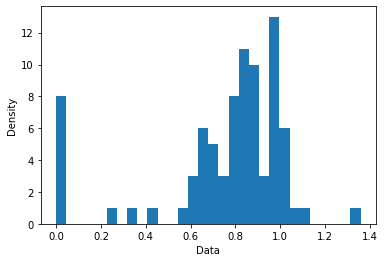

In [143]:
plt.hist(match_list, density=False, bins=30)  # density=False would make counts
plt.ylabel('Density')
plt.xlabel('Data');